## **Descriptive Analysis of the Data**


First lets have an initial look on the data to grasp the overall structure of the data.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('project_dataset.csv')


print(f"Rows: {data.shape[0]}\nColumns: {data.shape[1]}")

display(data.head())



Rows: 143424
Columns: 26


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,number_emergency,num_lab_procedures,number_diagnoses,num_medications,num_procedures,ndc_code,max_glu_serum,A1Cresult,change,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,0,41,1,1,0,NaN,NaN,NaN,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,0,59,9,18,0,68071-1701,NaN,NaN,Ch,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,0,11,6,13,5,0378-1110,NaN,NaN,No,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,0,44,7,16,1,68071-1701,NaN,NaN,Ch,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,0,51,5,8,0,0049-4110,NaN,NaN,Ch,NO


Now that we know how the columns look like, we now find statistical insights on the categorical data.

Before we move forward lets convert all missing values to a null value and have a look on which columns do have null values for future tests

In [3]:
import numpy as np

data=data.replace('?',np.nan)

missing_summary = pd.DataFrame({
    'Total Missing': data.isnull().sum(),
}).sort_values(by='Total Missing', ascending=False)

missing_summary = missing_summary[missing_summary['Total Missing'] > 0]

print("Columns with Missing Values:")
display(missing_summary)

Columns with Missing Values:


,Total Missing
weight,139122
max_glu_serum,136409
A1Cresult,117650
medical_specialty,69463
payer_code,54190
ndc_code,23462
race,3309
primary_diagnosis_code,33


Weight and max_glu_sreum have a really large percent of missing values compared to the whole dataset.

In [4]:
data.drop('weight', axis=1, inplace=True)
data.drop('max_glu_serum', axis=1, inplace=True)

data.drop('patient_nbr', axis=1, inplace=True) # not required
data.drop('encounter_id', axis=1, inplace=True) # not required
data.drop('payer_code', axis=1, inplace=True) # not required
data.drop('ndc_code', axis=1, inplace=True) # not required
data.drop('other_diagnosis_codes', axis=1, inplace=True) # Complicated data



In [ ]:

print("\nStatistical summary (Categorical):")
display(data.describe(include='object'))


Statistical summary (Categorical):


,race,gender,age,weight,payer_code,medical_specialty,primary_diagnosis_code,other_diagnosis_codes,ndc_code,max_glu_serum,A1Cresult,change,readmitted
count,143424,143424,143424,143424,143424,143424,143424,143424,119962,7015,25774,143424,143424
unique,6,3,10,10,18,73,717,19374,251,3,3,2,3
top,Caucasian,Female,[70-80),?,?,?,414,250|401,68071-1701,Norm,>8,Ch,NO
freq,107688,76185,36928,139122,54190,69463,9473,3637,20770,3220,13110,88669,77248


**From the summary we can make a few insights:**

- Weight, payer_code, medical_speciality have a lot of null values
- Readmitted which will be our target variable for prediction is also represented as categorical data
- Some columns have rather complex structures such as other_diagnosis_codes

Lets try to find the % distributions for notable columns.

**Analyzing**

- Readmission Status
- Race Distribution
- Age Distribution
- Gender Distribution
- Change Status

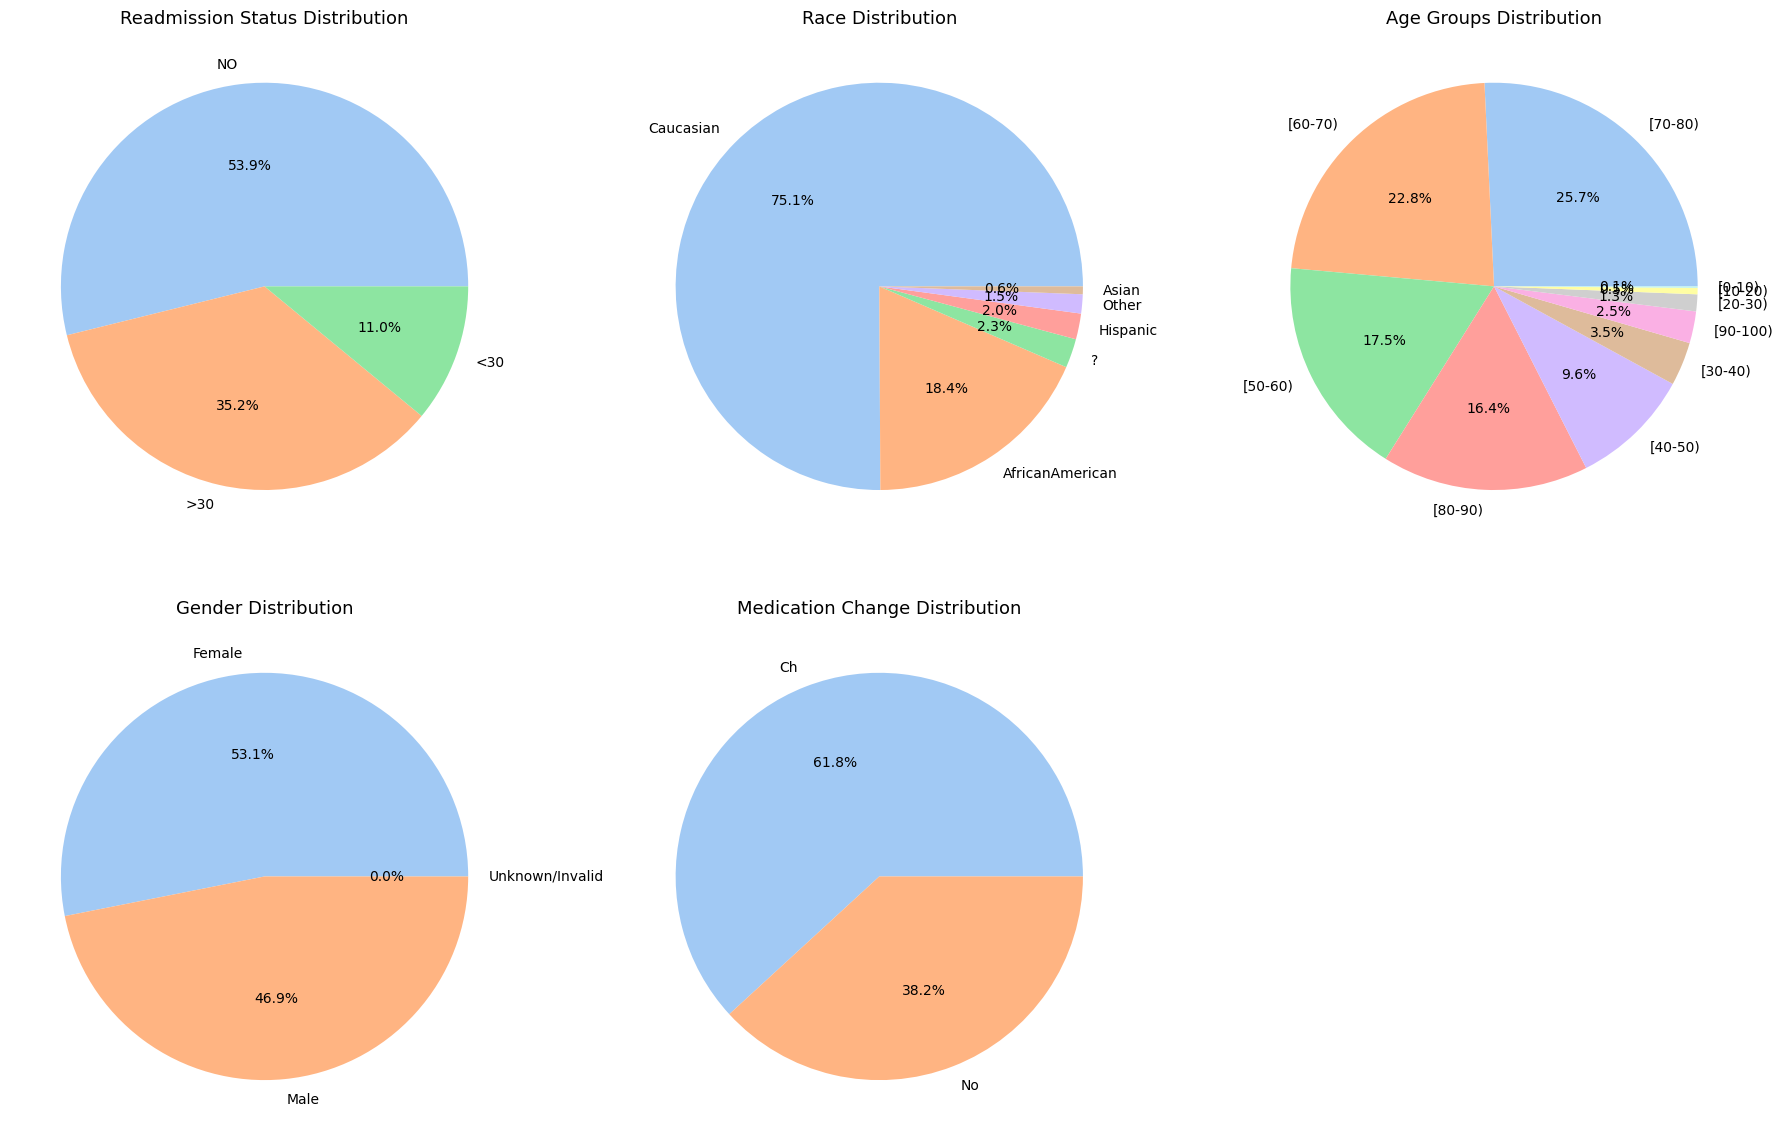

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
categorical_columns = ['readmitted', 'race', 'age', 'gender', 'change']
titles = ['Readmission Status', 'Race', 'Age Groups', 'Gender', 'Medication Change']

for i, (columns, title) in enumerate(zip(categorical_columns, titles)):
    ax = axes.flatten()[i]
    data[columns].value_counts(normalize=True).plot.pie(
        autopct='%1.1f%%',
        colors=sns.color_palette('pastel'),
        ax=ax
    )
    ax.set_title(f'{title} Distribution', fontsize=13)
    ax.set_ylabel('')

fig.delaxes(axes[-1,-1])

plt.tight_layout()
plt.show()

In [ ]:
print("\nStatistical summary (Numerical):")
display(data.describe())


Statistical summary (Numerical):


,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,number_outpatient,number_inpatient,number_emergency,num_lab_procedures,number_diagnoses,num_medications,num_procedures
count,1.434240e+05,1.434240e+05,143424.000000,143424.000000,143424.000000,143424.000000,143424.000000,143424.000000,143424.000000,143424.000000,143424.000000,143424.000000,143424.000000
mean,1.674290e+08,5.493608e+07,2.027694,3.655316,5.701096,4.490190,0.362429,0.600855,0.195086,43.255745,7.424434,16.776035,1.349021
std,1.019046e+08,3.857840e+07,1.427585,5.219279,4.064532,2.999667,1.249295,1.207934,0.920410,19.657319,1.924872,8.397130,1.719104
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,8.829596e+07,2.357219e+07,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,32.000000,6.000000,11.000000,0.000000
50%,1.547637e+08,4.630783e+07,1.000000,1.000000,7.000000,4.000000,0.000000,0.000000,0.000000,44.000000,8.000000,15.000000,1.000000
75%,2.320897e+08,8.823627e+07,3.000000,3.000000,7.000000,6.000000,0.000000,1.000000,0.000000,57.000000,9.000000,21.000000,2.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,42.000000,21.000000,76.000000,132.000000,16.000000,81.000000,6.000000


**From the summary we can make a few insights:**

- Most admissions are emergencies (type 1).
- Most discharges are to home (type 1).
- Average hospital stay: 4.5 days (75% ≤6 days).
- Most patients have 0 outpatient visits (max 42 outliers).
- Inpatient visits average 0.6 (max 21).
- Lab tests: 43 avg (32–57 for middle 50%).
- Diagnoses: 7.4 avg (max 16).
- Medications: 17 avg (25% take ≥21).
- Procedures: 1.35 avg (75% ≤2).
- Emergency visits max at 76 (extreme outlier).
- Admission sources vary (mean code 5.7, max 25).
- Short hospital stays (2–4 days) are the most.


### **Analyzing the numerical data more intensively**

First analyzing if the data is skewed:

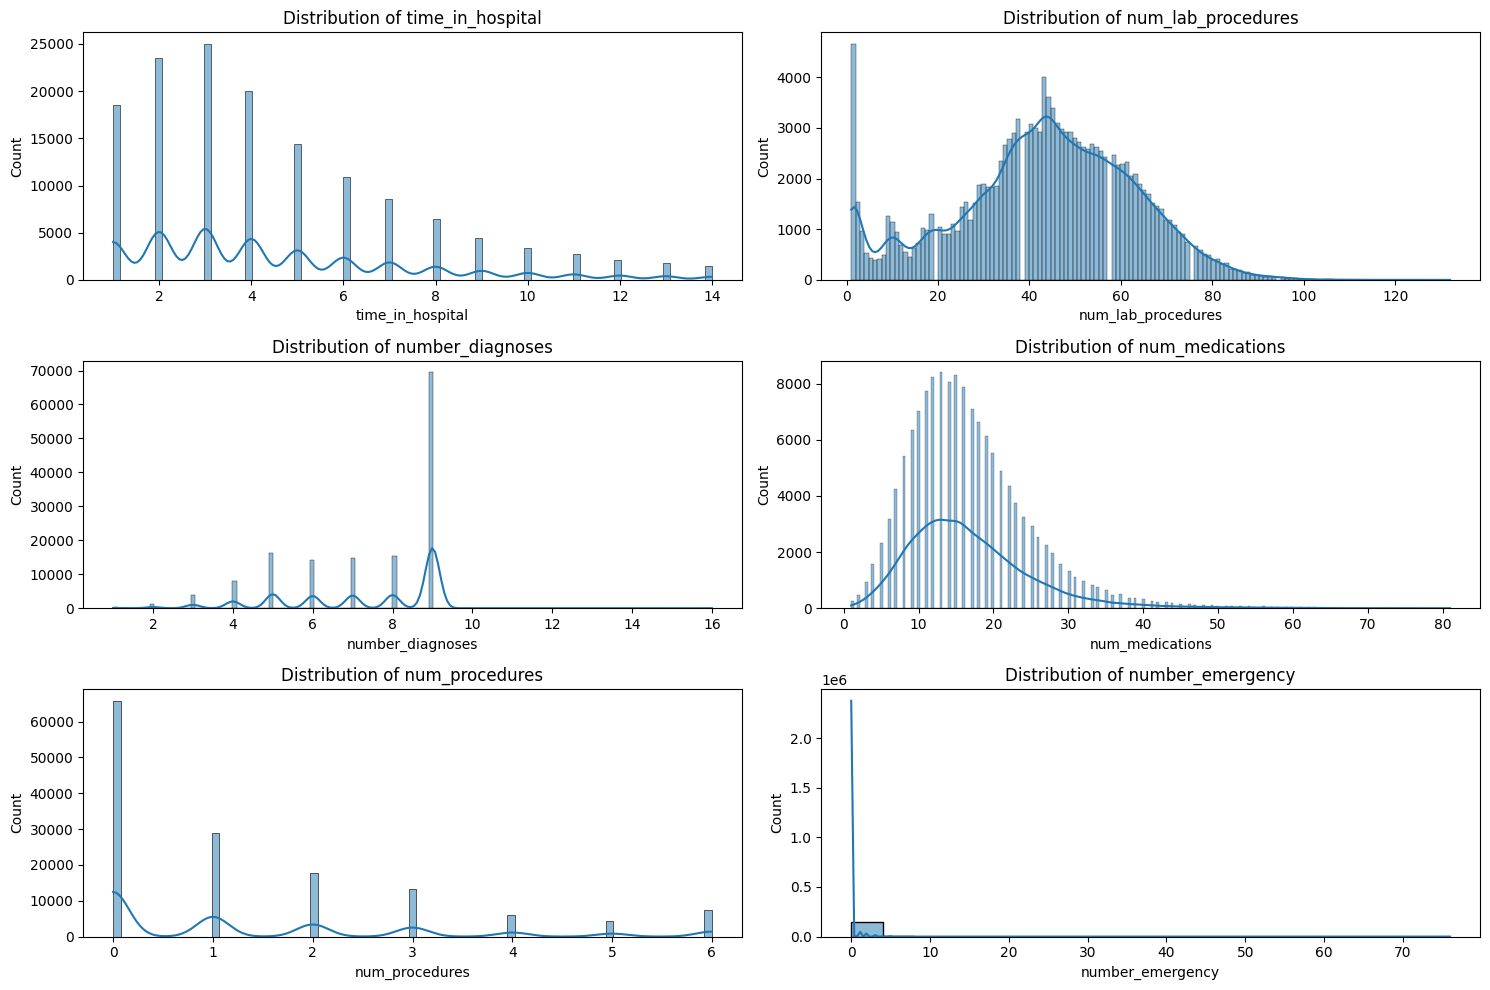

In [ ]:
numerical_columns = ['time_in_hospital'	,'num_lab_procedures',	'number_diagnoses', 'num_medications',	'num_procedures','number_emergency',]

fig, axes = plt.subplots(3, 2, figsize=(15, 10))

for i, col in enumerate(numerical_columns):

    ax = axes.flatten()[i]
    sns.histplot(data[col], kde=True, ax=ax)
    ax.set_title(f'Distribution of {col}')


plt.tight_layout()
plt.show()


**From the charts we can see that:**

- time_on_hospital is skewed to the right where most are clustered around 1-5 days
- num_lab_procedures is also right skewed with a little more variance as it peaks around 40 but extends way over 100.
- number_diagnoses has a peak of 9 with more diagnoses being <= 9
- num_medications shows a right skew as well with a peak around 101-5 medications
- the num_procedures is right skewed as well extended over to 6
- number_emergency is heavily right skewed

### **Analyzing the outliers in the data**

In [ ]:
numerical_columns = ['time_in_hospital'	,'number_outpatient',	'number_inpatient',	'number_emergency'	,'num_lab_procedures'	,'number_diagnoses'	,'num_medications'	,'num_procedures']

print("\n95th Percentile Values:")
display(data[numerical_columns].quantile(0.95))


95th Percentile Values:


,0.95
time_in_hospital,11.0
number_outpatient,2.0
number_inpatient,3.0
number_emergency,1.0
num_lab_procedures,73.0
number_diagnoses,9.0
num_medications,32.0
num_procedures,6.0


**From the above data its apparent that some fields have more problematic outliers than others:**

- The number_emergency outlier suggests that 95% had <= 1 emergency visits but as we have seen before 76 is the max
- 95% of patients had <= 2 outpatient visits in the past year up to 42
- 95% had <= 73 lab tests during hospitalization up to 132
- 95% were prescribed <= 32 medications this goes up to 81
- 95% had ≤9 diagnoses but it goes up to 16

## **Inferential Analysis**



In [5]:
copy_of_data = data.copy()
##Target data
copy_of_data['readmission_status'] = copy_of_data['readmitted'].map({
    'NO': 0,
    '>30': 1,
    '<30': 2
})



### **Question:** Which data features have the highest difference between the readmission status' if any?

Chi2: 196.7087, P-value: 0.0000


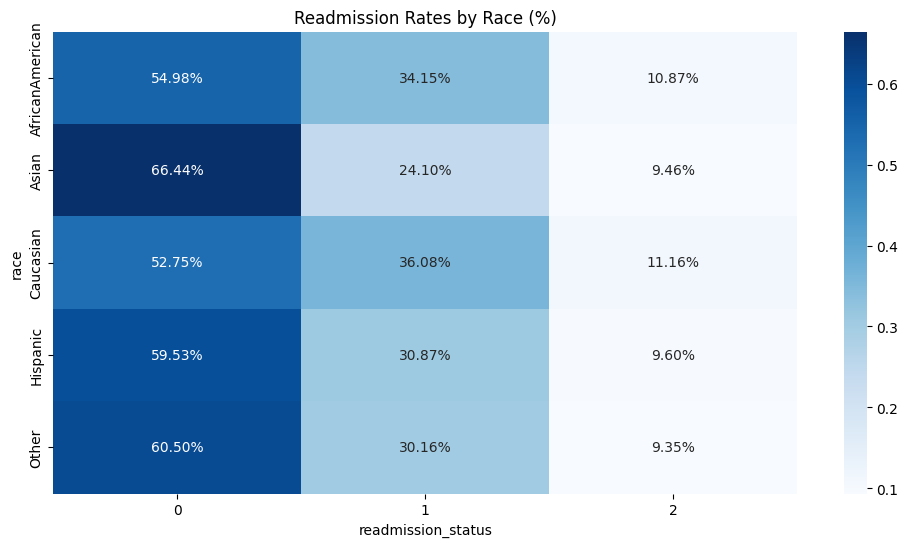

In [44]:
from scipy.stats import chi2_contingency


contingency_table = pd.crosstab(copy_of_data['race'], copy_of_data['readmission_status'])
chi, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi2: {chi:.4f}, P-value: {p:.4f}")


plt.figure(figsize=(12,6))
sns.heatmap(contingency_table.div(contingency_table.sum(1), axis=0), annot=True, cmap='Blues', fmt='.2%')
plt.title('Readmission Rates by Race (%)')
plt.show()



The Chi scores and P value suggest that there is some difference between readmission_status and race with african americans and caucasians having a higher chance of being readmitted overall both >30 and <30 days

**Analyzing correlations between gender and readmission status**

Chi2:60.7035, P-value:0.0000


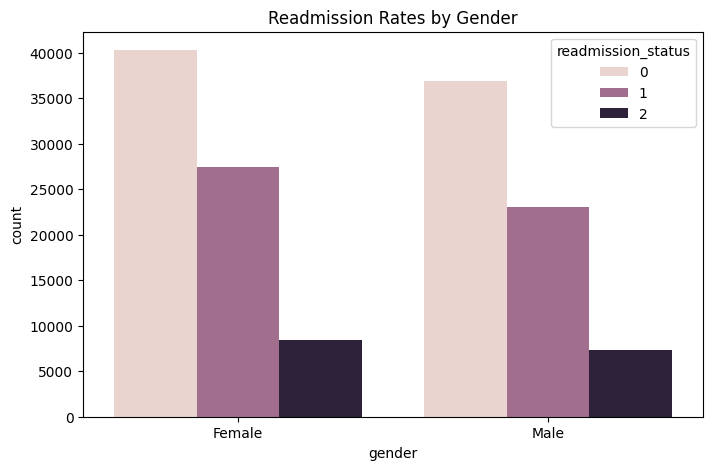

In [53]:
contingency_table = pd.crosstab(copy_of_data['gender'], copy_of_data['readmission_status'])
chi, p, dof, expected  = chi2_contingency(contingency_table)
print(f"Chi2:{chi:.4f}, P-value:{p:.4f}")

plt.figure(figsize=(8,5))
sns.countplot(x='gender', hue='readmission_status', data=copy_of_data)
plt.title('Readmission Rates by Gender')
plt.show()

The Chi scores and P value suggest that there is some difference between readmission_status and gender though not as much as race did.

**Analyzing Readmission rates by age**

Chi2: 486.6792, P-value: 0.0000


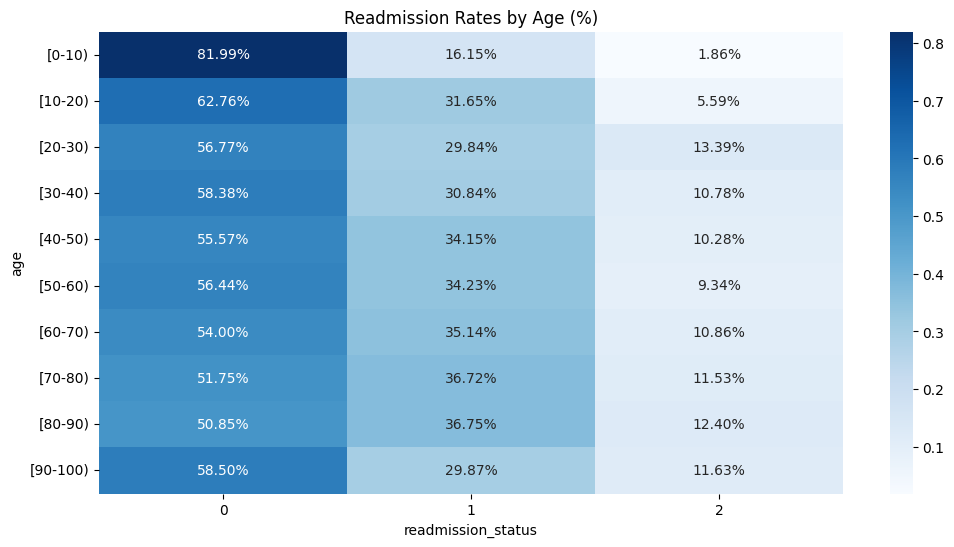

In [58]:
contingency_table = pd.crosstab(copy_of_data['age'], copy_of_data['readmission_status'])
chi, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi2: {chi:.4f}, P-value: {p:.4f}")

plt.figure(figsize=(12,6))
sns.heatmap(contingency_table.div(contingency_table.sum(1), axis=0), annot=True, cmap='Blues', fmt='.2%')
plt.title('Readmission Rates by Age (%)')
plt.show()

There is a high chi2 score suggesting a high difference between the different ages and the % of readmission status

**Analyzing Readmission rates by medical speciality**

Chi2: 1871.4548, P-value: 0.0000


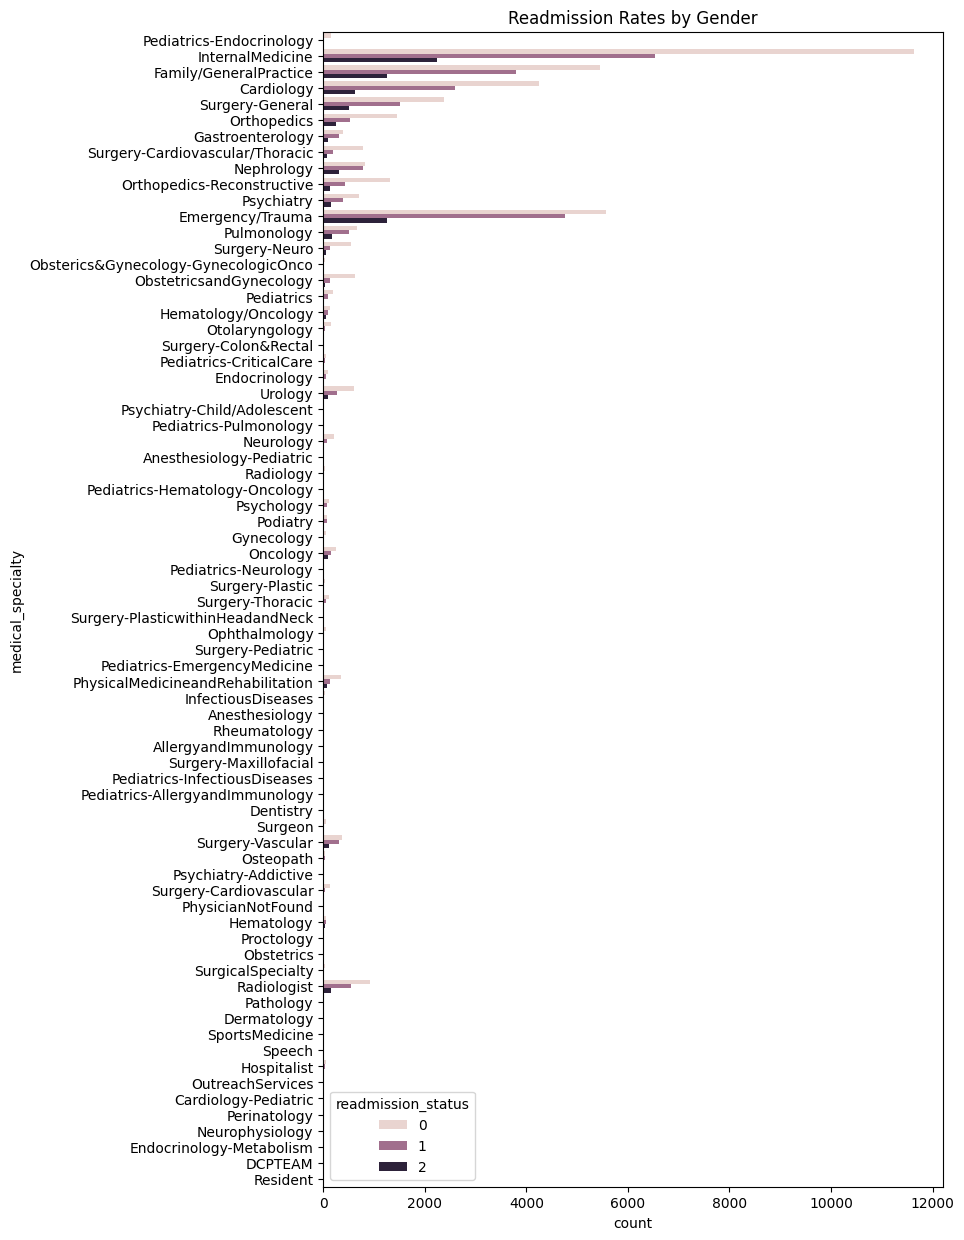

In [62]:
contingency_table = pd.crosstab(copy_of_data['medical_specialty'], copy_of_data['readmission_status'])
chi, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi2: {chi:.4f}, P-value: {p:.4f}")

plt.figure(figsize=(8,15))
sns.countplot(y='medical_specialty', hue='readmission_status', data=copy_of_data)
plt.title('Readmission Rates by Medical Speciality')
plt.show()

We can see that there is a clear difference in readmission status for some medical specialities

**Analyzing Readmission rates by A1Cresult**

Chi2: 9.2921, P-value: 0.0542


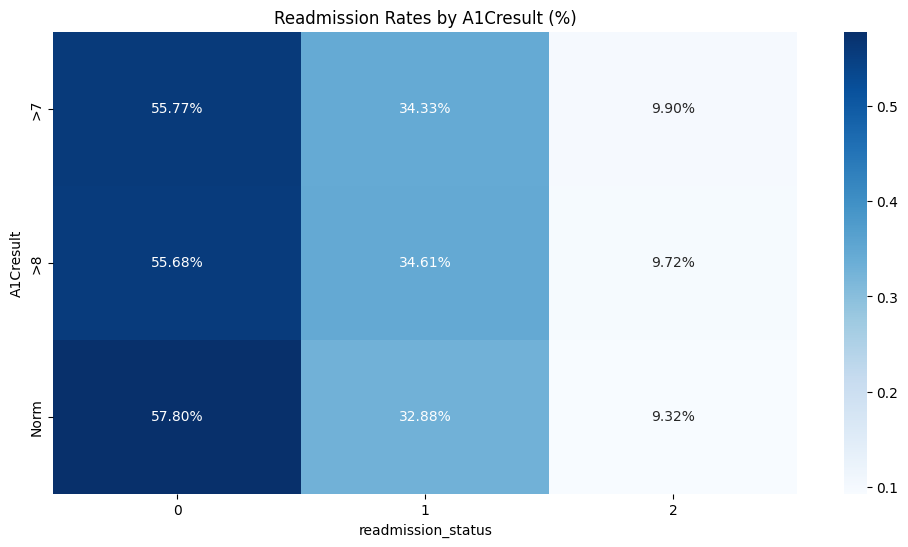

In [64]:

contingency_table = pd.crosstab(copy_of_data['A1Cresult'], copy_of_data['readmission_status'])
chi, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi2: {chi:.4f}, P-value: {p:.4f}")

plt.figure(figsize=(12,6))
sns.heatmap(contingency_table.div(contingency_table.sum(1), axis=0), annot=True, cmap='Blues', fmt='.2%')
plt.title('Readmission Rates by A1Cresult (%)')
plt.show()

The values here indicate that the results don't differ as much between the A1Cresult and the readmission status

**Analyzing Readmission rates by change in medication**

Chi2: 170.8988, P-value: 0.0000


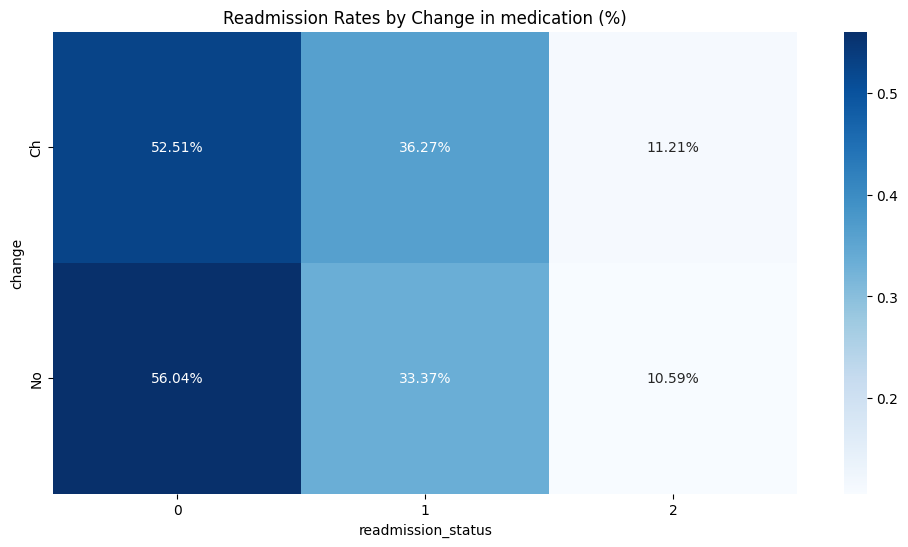

In [65]:
contingency_table = pd.crosstab(copy_of_data['change'], copy_of_data['readmission_status'])
chi, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi2: {chi:.4f}, P-value: {p:.4f}")

plt.figure(figsize=(12,6))
sns.heatmap(contingency_table.div(contingency_table.sum(1), axis=0), annot=True, cmap='Blues', fmt='.2%')
plt.title('Readmission Rates by Change in medication (%)')
plt.show()

The results again show that there is a difference between the change in medication and the readmission status

### **Question:** Does the the stay duration affect the readmission status?

ANOVA p-value: 0.000000
ANOVA f-stat: 230.762981


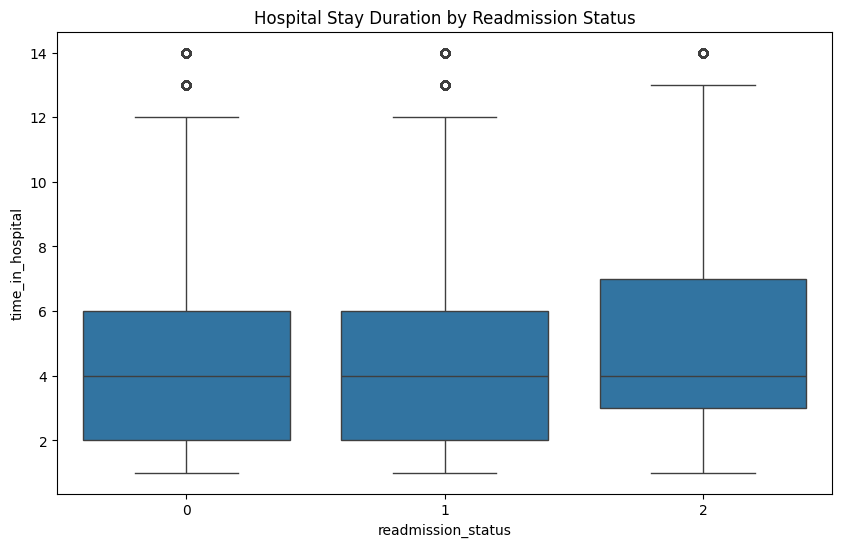

In [27]:
from scipy.stats import ttest_ind
from scipy.stats import f_oneway

group_0 = copy_of_data[copy_of_data['readmission_status'] == 0]['time_in_hospital']
group_1 = copy_of_data[copy_of_data['readmission_status'] == 1]['time_in_hospital']
group_2 = copy_of_data[copy_of_data['readmission_status'] == 2]['time_in_hospital']

f_stat, p_value = f_oneway(group_0, group_1, group_2)
print(f"ANOVA p-value: {p_value:.6f}")
print(f"ANOVA f-stat: {f_stat:.6f}")

plt.figure(figsize=(10,6))
sns.boxplot(x='readmission_status', y='time_in_hospital', data=copy_of_data)
plt.title('Hospital Stay Duration by Readmission Status')
plt.show()

From the data above we can definitely see that people who were readmitted within 30 days averaged more time in hospital than those who weren't readmitted or were readmitted after 30 days.

Lets group the readmission status into binary values for further tests. Grouping readmission more than 30 days and less than 30 days together.

In [7]:
copy_of_data['target']=(copy_of_data['readmitted'] !='NO').astype('int')

### **Question:** Do things like the time in hospital spent, number of medications, number of procedures be used for predicting?

In [8]:
import statsmodels.api as sm


X = copy_of_data[['time_in_hospital', 'num_medications', 'num_procedures']]
X = sm.add_constant(X)
y = copy_of_data['target']

model = sm.Logit(y, X).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.686535
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:               143424
Model:                          Logit   Df Residuals:                   143420
Method:                           MLE   Df Model:                            3
Date:                Thu, 10 Apr 2025   Pseudo R-squ.:                0.005258
Time:                        12:35:59   Log-Likelihood:                -98466.
converged:                       True   LL-Null:                       -98986.
Covariance Type:            nonrobust   LLR p-value:                2.321e-225
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.3592      0.012    -28.988      0.000      -0.383      -0.335
time_in_hos

From the above model,
All these coefficients have very low p-values, which means they are statistically significant predictors.

The Pseudo R-squared (0.005258) is very low, suggesting that while these variables are statistically significant, they explain only a small part of the variability in readmission status.

In [9]:

data_race_age_gender = copy_of_data[['race', 'age', 'gender']]
copy_of_data_edited = pd.get_dummies(data_race_age_gender, columns=['race',  'age', 'gender'], drop_first=True)

X = copy_of_data_edited
X = sm.add_constant(X)
X = X.astype(int)
y = copy_of_data['target']

model = sm.Logit(y, X).fit()
print(model.summary())

         Current function value: 0.687828
         Iterations: 35


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:               143424
Model:                          Logit   Df Residuals:                   143408
Method:                           MLE   Df Model:                           15
Date:                Thu, 10 Apr 2025   Pseudo R-squ.:                0.003385
Time:                        12:36:17   Log-Likelihood:                -98651.
converged:                      False   LL-Null:                       -98986.
Covariance Type:            nonrobust   LLR p-value:                4.330e-133
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -1.5753      0.206     -7.662      0.000      -1.978      -1.172
race_Asian                -0.4411      0.072     -6.114      0.000      -0.583      -0.300
race

Pseudo R-squared: It's very low (0.003385), meaning that the predictors explain only a tiny fraction of the variability in the target.

## **Making the model:**

First we encode all the categorical data

In [10]:
categories = ['race', 'age', 'gender', 'medical_specialty', 'primary_diagnosis_code', 'A1Cresult', 'change']

data_cats = copy_of_data[categories]
data_encoded = pd.get_dummies(data_cats, columns=categories, drop_first=True)

data_encoded = sm.add_constant(data_encoded)
data_encoded = data_encoded.astype(int)

num_categories = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'number_outpatient', 'number_inpatient', 'number_emergency', 'num_lab_procedures', 'number_diagnoses', 'num_medications', 'num_procedures']

data_num = copy_of_data[num_categories]

data_model=pd.concat([data_num,data_encoded],axis=1)

data_model.head()


,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,number_outpatient,number_inpatient,number_emergency,num_lab_procedures,number_diagnoses,num_medications,...,primary_diagnosis_code_V58,primary_diagnosis_code_V60,primary_diagnosis_code_V63,primary_diagnosis_code_V66,primary_diagnosis_code_V67,primary_diagnosis_code_V70,primary_diagnosis_code_V71,A1Cresult_>8,A1Cresult_Norm,change_No
0,6,25,1,1,0,0,0,41,1,1,...,0,0,0,0,0,0,0,0,0,1
1,1,1,7,3,0,0,0,59,9,18,...,0,0,0,0,0,0,0,0,0,0
2,1,1,7,2,2,1,0,11,6,13,...,0,0,0,0,0,0,0,0,0,1
3,1,1,7,2,0,0,0,44,7,16,...,0,0,0,0,0,0,0,0,0,0
4,1,1,7,1,0,0,0,51,5,8,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

import statsmodels.api as sm

from sklearn.model_selection import train_test_split



X=data_model
y=copy_of_data['target']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)


from sklearn import tree
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


models = {
    "Decision Tree": DecisionTreeClassifier(max_depth=30, criterion="entropy", min_samples_split=10),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "SVM": LinearSVC(dual=False),
    "Random Forest": RandomForestClassifier(n_estimators=20, max_depth=30, criterion="entropy", min_samples_split=10),
    "Logistic Regression": LogisticRegression(penalty='l2')
}



from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[num_categories] = scaler.fit_transform(X_train[num_categories])
X_test_scaled[num_categories] = scaler.transform(X_test[num_categories])

for name, model in models.items():
    if name in ["SVM", "KNN", "Logistic Regression"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    print(f"\n{name} Performance:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Precision: {precision_score(y_test, y_pred):.2f}")
    print(f"Recall: {recall_score(y_test, y_pred):.2f}")



Decision Tree Performance:
Accuracy: 0.69
Precision: 0.68
Recall: 0.62

KNN Performance:
Accuracy: 0.65
Precision: 0.63
Recall: 0.59

Naive Bayes Performance:
Accuracy: 0.49
Precision: 0.48
Recall: 0.95

SVM Performance:
Accuracy: 0.62
Precision: 0.62
Recall: 0.45

Random Forest Performance:
Accuracy: 0.68
Precision: 0.70
Recall: 0.52
